In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
data = load_iris()

In [5]:
# data is a json object 
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['target'] = data.target

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
model = LogisticRegression(max_iter=200)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [15]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
import matplotlib.pyplot as plt

In [16]:
df['species'] = data.target_names[data.target]

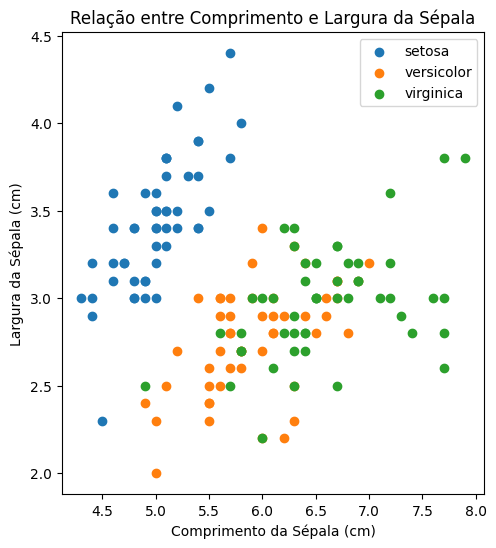

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)
plt.title('Relação entre Comprimento e Largura da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.legend()


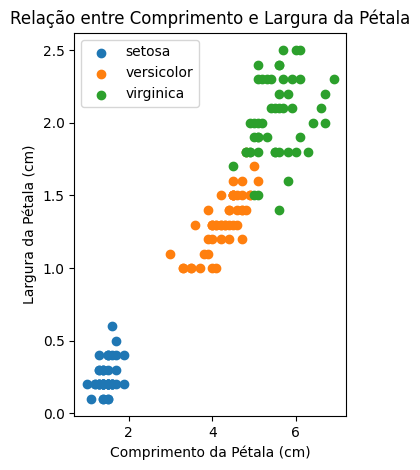

In [22]:
plt.subplot(1, 2, 2) 
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species)
plt.title('Relação entre Comprimento e Largura da Pétala')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Criando uma instância da classe IrisFeatures
try:
    iris_instance = IrisFeatures(sepal_length="string", sepal_width=3.5, petal_length=1.4, petal_width=0.2)
    print(iris_instance)
except ValueError as e:
    print(f"Erro ao criar a instância de IrisFeatures: {e}")

Erro ao criar a instância de IrisFeatures: 1 validation error for IrisFeatures
sepal_length
  Input should be a valid number, unable to parse string as a number [type=float_parsing, input_value='string', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/float_parsing
